# Testing A-F plots

In [1]:
import numpy as np
import math
import importlib as imp
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm as tqdmn

import main_1GnB as main

---
---
## Testing `single_run_1GnB()` - time evolution

In [22]:
n = 2

# GEN
p_gen = 0.5
F_new = 0.9
rho_new = np.diag([F_new, (1-F_new)/3, (1-F_new)/3, (1-F_new)/3])

# PURIF
q_purif_vec = np.linspace(0,1,5)
purif_policies = [main.policy_identity, main.policy_DEJMPS]
policy_names = ['Identity', 'DEJMPS']
pur_after_swap = False

# NOISE
Gamma = 1/5

# CONS
p_cons = 0.3

# Numerical
t_end = int(1e5)
randomseed = 2

In [23]:
## SIMULATION ##

imp.reload(main)

Fcons_avg_vec = [[] for policy in purif_policies]
Fcons_stderr_vec = [[] for policy in purif_policies]
A_avg_vec = [[] for policy in purif_policies]
A_stderr_vec = [[] for policy in purif_policies]

for idx_policy, purif_policy in enumerate(purif_policies):
    for q_purif in tqdmn(q_purif_vec):
        F_avg,F_err,A_avg,A_err,_, _, _ = main.single_run_1GnB(n, p_gen, rho_new, q_purif, 
                                                               purif_policy, pur_after_swap, Gamma,
                                                               p_cons, t_end, randomseed)
        Fcons_avg_vec[idx_policy] += [F_avg]
        Fcons_stderr_vec[idx_policy] += [F_err]
        A_avg_vec[idx_policy] += [A_avg]
        A_stderr_vec[idx_policy] += [A_err]
        
sim_data = {'Fcons_avg_vec': Fcons_avg_vec,
            'Fcons_stderr_vec': Fcons_stderr_vec,
            'A_avg_vec': A_avg_vec,
            'A_stderr_vec': A_stderr_vec}

In [31]:
## THEORY ##

imp.reload(main)

Fcons_theory_vec = [[] for policy in purif_policies]
A_theory_vec = [[] for policy in purif_policies]

print('WARNING: we are not calculating the theory values rn, using simulation as placeholder!')

for idx_policy, purif_policy in enumerate(purif_policies):
    for q_purif in q_purif_vec:
        Fcons_theory_vec[idx_policy] = Fcons_avg_vec[idx_policy]
        A_theory_vec[idx_policy] = A_avg_vec[idx_policy]

theory_data = {'Fcons_avg': Fcons_theory_vec,
                'A': A_theory_vec}

In [47]:
def AFplot(policy_names, sim_data=None, theory_data=None, filename=None):
    fig, ax = plt.subplots()
    colors = ['tab:blue', 'tab:orange', 'tab:purple']
    markers = ['^','v','o','s']

    if sim_data:
        for idx_policy, policy in enumerate(policy_names):
            plt.errorbar(sim_data['A_avg_vec'][idx_policy], sim_data['Fcons_avg_vec'][idx_policy],
                         xerr=sim_data['A_stderr_vec'][idx_policy],
                         yerr=sim_data['Fcons_stderr_vec'][idx_policy],
                         marker=markers[idx_policy], color=colors[idx_policy],
                         linestyle=':', capsize=3, label=policy+' (sim.)')
    
    if theory_data:
        for idx_policy, policy in enumerate(policy_names):
            plt.plot(theory_data['A'][idx_policy], theory_data['Fcons_avg'][idx_policy],
                         color=colors[idx_policy], linestyle='-', label=policy+' (theory)')
        
    
    # Plot specs
    plt.legend()
    plt.xlabel(r'Availability')
    plt.ylabel(r'Avg. consumed fidelity')
    plt.xlim(0.6,0.75)
    plt.ylim(0.6,0.9)
    
    if filename:
        print('Save not implemented')
    return

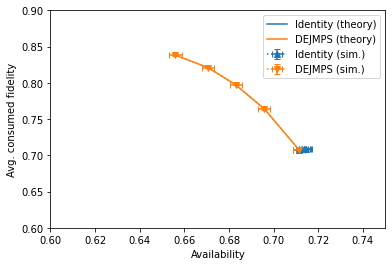

In [48]:
## PLOT ##

AFplot(policy_names, sim_data=sim_data, theory_data=theory_data, filename=None)

---
### CONCLUSIONS:
 1. From visual inspection, seems to be working. Not tested quantitatively.
---